In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ejercicio práctica 4: Optimización no lineal con Scipy

Consideremos la función de activación 
$$
\sigma (x) = \max\left\{x, 0\right\}
$$
que, en Machine Learning, es conocida como **ReLU** (Linear Unit Rectifier).
A partir de ella construimos la sencilla red neuronal con dos canales de entrada $(x, y)$ y una sóla neurona
$$
NN(x, y) =  \sigma\left( 2 * x - 3 * y + 1\right)
$$
Se pide:

1) ¿Es diferenciable esta función? ¿Por qué?
    
    No es diferenciable en 2x-3y+1 = 0 porque, cuando 2x-3y+1 > 0, la funcion es lineal y tiene pendiente constante, en cambio, cuando 2x-3y+1 <= 0, la funcion es constante y la derivada es 0.
2) Define dicha función.


In [2]:
# Completar aquí
def relu(x):
    return np.maximum(x, 0)

def NN(v):
    x, y = v
    nn = relu(2 * x - 3 * y + 1)
    return nn
# --------------------


Define ahora la función objetivo siguiente:
$$
MSE ( x, y) = \frac{1}{2} * \left[ (NN(x,y) -1)^2 + (NN(x,y) - 2)^2\right]
$$

In [3]:
# Completar aquí
def MSE(v):
    mse = 1/2 * ((NN(v) - 1)**2 + (NN(v) - 2)**2)
    return mse
# --------------------


Dibuja la función $MSE ( x, y)$ en la ventana $-5\leq x\leq 5$, $-5\leq y\leq 5$.

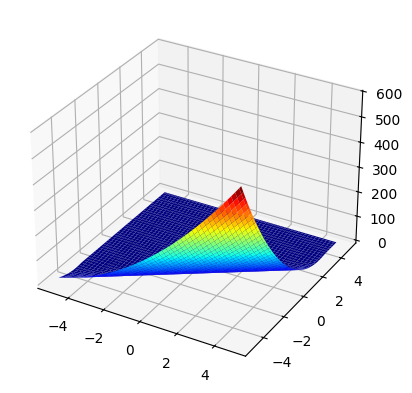

In [4]:
# Completar aquí
r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
result = MSE(v)

fig, ax =  plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x, y, result, cmap='jet')

plt.show()
# --------------------


Minimiza $MSE ( x, y)$ con el algoritmo de Powell y tomando como punto de inicialización uno elegido aleatoriamente. 

In [5]:
# Completar aquí

initial_guess = r_min + np.random.rand(2) * (r_max - r_min)

result = minimize(MSE, initial_guess, method='powell')

print('Estado : %s' % result['message'])
print('Número total de evaluaciones de la función objetivo: %d' % result['nfev'])

solution = result['x']
evaluation = MSE(solution)
print('Solución: f(%s) = %.5f' % (solution, evaluation))
# --------------------


Estado : Optimization terminated successfully.
Número total de evaluaciones de la función objetivo: 101
Solución: f([-3.85572084 -2.73714723]) = 0.25000
